In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Loading The Data By Chunk Because Of Memory

In [2]:
chunks = []

for i in range(10):
    chunk = pd.read_csv(f"./Letters/Letters ({i+1}).csv")
    chunks.append(chunk)

In [3]:
df = pd.concat(chunks).reset_index(drop=True)

In [4]:
df.head()

,Letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(320000, 785)

<Axes: >

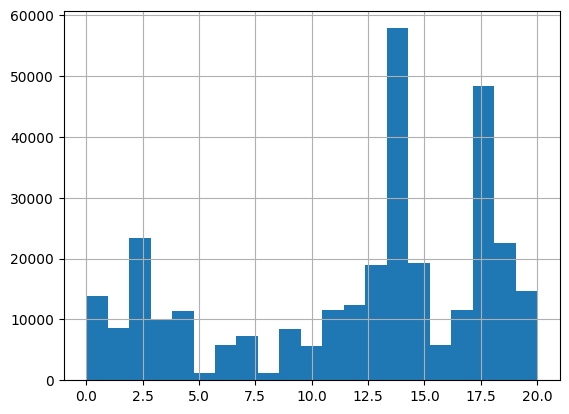

In [6]:
df.Letter.hist(bins=21)

In [7]:
np.array(df.iloc[0][1:]).reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2, 177, 255, 188,  13,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 130, 255, 255, 255, 161,   0,   0,   0,   0,   0,
          0,   0],
       [  

array([[<Axes: title={'center': 'Letter'}>]], dtype=object)

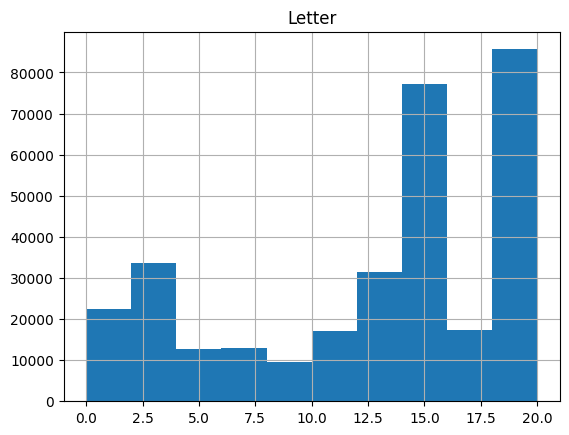

In [8]:
lettersIndexes = pd.DataFrame( df['Letter'] )
lettersIndexes.hist()

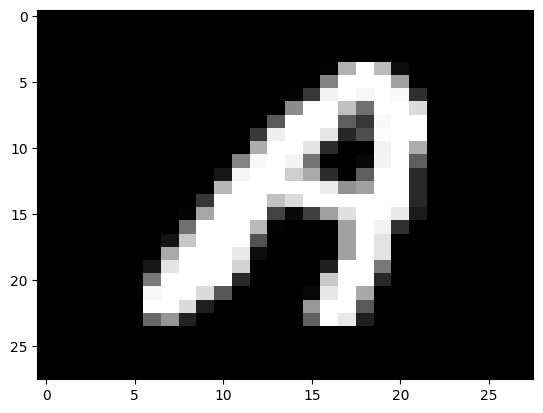

In [9]:
arr = np.array(df.iloc[0][1:]).reshape(28, 28)
plt.imshow(arr, cmap="gray", aspect='auto')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Letter', axis=1)
y = df['Letter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train = np.array( tf.keras.utils.normalize(X_train, axis=1) )
X_test = np.array( tf.keras.utils.normalize(X_test, axis=1) )

In [12]:
X_train = np.reshape( X_train, (X_train.shape[0], 28, 28))
X_test = np.reshape( X_test, (X_test.shape[0], 28, 28))

# Creating the model

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fitting the model

In [14]:
model.fit(X_train, y_train, epochs=6)

Epoch 1/6
8000/8000 [==============================] - 36s 4ms/step - loss: 0.3102 - accuracy: 0.9110
Epoch 2/6
8000/8000 [==============================] - 37s 5ms/step - loss: 0.1167 - accuracy: 0.9662
Epoch 3/6
8000/8000 [==============================] - 32s 4ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 4/6
8000/8000 [==============================] - 36s 5ms/step - loss: 0.0673 - accuracy: 0.9800
Epoch 5/6
8000/8000 [==============================] - 35s 4ms/step - loss: 0.0552 - accuracy: 0.9833
Epoch 6/6
8000/8000 [==============================] - 44s 6ms/step - loss: 0.0472 - accuracy: 0.9855


# Evaluating the model on the testing data

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2000/2000 [==============================] - 7s 3ms/step - loss: 0.0687 - accuracy: 0.9800
Loss: 0.06874720752239227, Accuracy: 0.9799844026565552


# Evaluating the model on self made data

In [16]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [17]:
def get_prediction(img_path):
    img = cv2.imread(img_path)[:,:,0]
    
    img = np.invert(np.array([img]))
    img = tf.keras.utils.normalize(img)
    prediction = model.predict(img)

    pred = alphabet[np.argmax(prediction)]
    print(f"Right answer is {img_path[0]}, and the predicted answer is {pred}")

    return pred

In [18]:
for i in ["A", "B", "C", "D", "E", "S", "Y"]:
    get_prediction(i + ".png")

1/1 [==============================] - 0s 183ms/step
Right answer is A, and the predicted answer is R
1/1 [==============================] - 0s 43ms/step
Right answer is B, and the predicted answer is U
1/1 [==============================] - 0s 41ms/step
Right answer is C, and the predicted answer is C
1/1 [==============================] - 0s 39ms/step
Right answer is D, and the predicted answer is D
1/1 [==============================] - 0s 39ms/step
Right answer is E, and the predicted answer is E
1/1 [==============================] - 0s 47ms/step
Right answer is S, and the predicted answer is S
1/1 [==============================] - 0s 52ms/step
Right answer is Y, and the predicted answer is T
